## K-means Clustering

This code shows and example of K-means clustering of two dimensional data points.
The number of clusters can be changed. All four main operations - random cluster
centroid initialization, location of nearest centroids, computation of new
centroid locations, and execution of the entire k-means loop - are programmed from 
scratch, to show the algorithms behind this classification method.

### Find closest centroids, Compute new centroids, Initialize centroids, and Run k-means functions

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

def find_closest_centroids(X, centroids):       # find closest centroid for each data sample in X
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)                           # array where we keep the centroids attached to each data point
    
    for i in range(m):                          # for each data point
        min_dist = 1000000                      # define a default maximum distance (very large number)
        for j in range(k):                      # for each centroid
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)       # calculate squared distance (x2-x1)^2 + (y2-y1)^2 (no need for root)
            if dist < min_dist:                                 # if it is the smallest distance:
                min_dist = dist                 # remember it
                idx[i] = j                      # remember the centroid
    
    return idx

def compute_centroids(X, idx, k):               # compute new values for centroids
    m, n = X.shape                              # m is number of data points, n is dimension of data points
    centroids = np.zeros((k, n))                # k is number of centroids (clusters)
    
    for i in range(k):                          # for each centroid:
        indices = np.where(idx == i)            # return a list of indices of the elements of idx that belong to that centroid cluster
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()  # calculate the new value of the centroid location
    
    return centroids

def init_centroids(X, k):                   # randomly initialize centroid locations
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)        # randomly initialize a list of k numbers between 0 and m
    for i in range(k):                      # for each centroid:
        centroids[i,:] = X[idx[i],:]        # position it at the same location as the idx-th data point
    
    return centroids

def run_k_means(X, initial_centroids, max_iters):   # run the k-means classification algorithm
    m, n = X.shape                                  # m is number of data points, n is dimension of data points
    k = initial_centroids.shape[0]                  # k is number of centroids (clusters)
    idx = np.zeros(m)                               # idx will store the centroids attached to each data point
    centroids = initial_centroids                   # initialize centroids
    
    for i in range(max_iters):                      # in every iteration:
        idx = find_closest_centroids(X, centroids)  # find the closest centroid for each data point
        centroids = compute_centroids(X, idx, k)    # update the centroid locations 
    
    return idx, centroids 

### Import and prepare data

In [70]:
data = loadmat('ex7data2.mat')              # load data 
X = data['X']
number_of_clusters = 3
number_of_iterations = 100

### Run k-means algorithm

In [71]:
#initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])    # initialize cluster centroids (exactly)
#initial_centroids = np.array([[4.5, 2], [1, 5], [2, 5]])    # initialize cluster centroids (exactly)
initial_centroids = init_centroids(X, number_of_clusters)   # initialize cluster centroids (randomly)

idx = find_closest_centroids(X, initial_centroids)          # find closest centroids for the first time (just for show)
print ("List of cluster assignment for each data point at the beginning:\n",idx)
print ("Initial centroid locations:\n",initial_centroids)
print ("Centroid locations after just one interation:\n",compute_centroids(X, idx, number_of_clusters))         # compute initial centroid locations
idx, centroids = run_k_means(X, initial_centroids, number_of_iterations)    # run k-means 

cluster1 = X[np.where(idx == 0)[0],:]       # sort the data points in clusters according to idx list
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]
cluster4 = X[np.where(idx == 3)[0],:]
cluster5 = X[np.where(idx == 4)[0],:]
cluster6 = X[np.where(idx == 5)[0],:]

print ("Final centroid locations:\n",compute_centroids(X, idx, number_of_clusters))         # compute final centroid locations (compare with initial) 

List of cluster assignment for each data point at the beginning:
 [0. 2. 2. 2. 2. 0. 0. 2. 2. 2. 2. 2. 0. 2. 0. 2. 2. 2. 0. 2. 0. 2. 2. 0.
 0. 2. 2. 0. 0. 0. 2. 2. 2. 2. 2. 2. 0. 2. 2. 0. 2. 2. 2. 0. 0. 2. 2. 2.
 0. 2. 2. 2. 2. 2. 2. 2. 0. 0. 2. 0. 0. 2. 0. 0. 2. 0. 2. 0. 2. 2. 2. 0.
 0. 2. 2. 0. 0. 2. 0. 0. 0. 2. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 0. 2. 2. 2.
 2. 0. 0. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 2. 1. 2. 2. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1.
 2. 1. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 2. 1. 1.
 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 2. 1. 2. 2. 1. 2. 2. 2. 1. 1. 1. 1. 2. 1.
 2. 2. 1. 1. 2. 2. 1. 2. 1. 2. 1. 0.]
Initial centroid loc

### Plot the resulting clusters

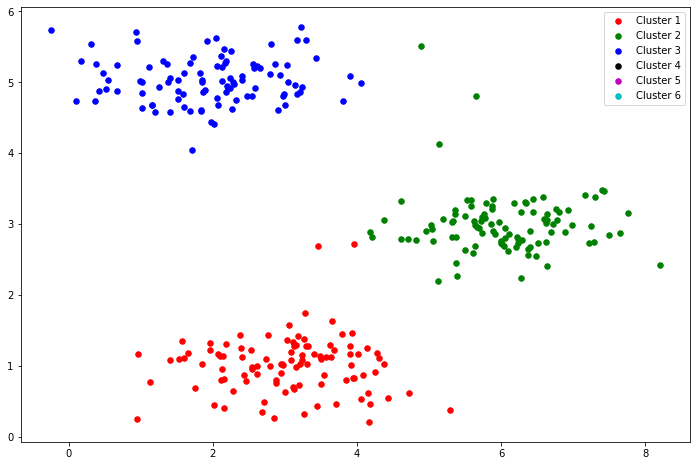

In [72]:
fig, ax = plt.subplots(figsize=(12,8))                      # scatter plot the clustered data 
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.scatter(cluster4[:,0], cluster4[:,1], s=30, color='k', label='Cluster 4')
ax.scatter(cluster5[:,0], cluster5[:,1], s=30, color='m', label='Cluster 5')
ax.scatter(cluster6[:,0], cluster6[:,1], s=30, color='c', label='Cluster 6')
ax.legend() 